# Document Scanner 

## Load Necessary Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Load Image

In [2]:
img_orig = cv2.imread('./images/03.jpg')

### View image Method 1 

In [3]:
'''
cv2.namedWindow('Orginal', cv2.WINDOW_NORMAL)
cv2.imshow('original', img_orig)
cv2.waitKey()
cv2.destroyAllWindows()'''

"\ncv2.namedWindow('Orginal', cv2.WINDOW_NORMAL)\ncv2.imshow('original', img_orig)\ncv2.waitKey()\ncv2.destroyAllWindows()"

### View image Method 2

Text(0.5, 1.0, 'Original Image')

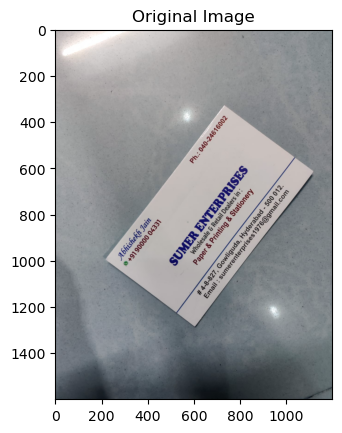

In [4]:
plt.subplot()
plt.imshow(img_orig)
plt.title('Original Image')

### 

## Scanning



## 1. Resize the Image and Set Aspect Ratio

In [5]:
def resizer(image, width = 500):
    
    #get width and height
    h, w, c = image.shape
    
    height = int((h/w)*width)
    size = (width, height)
    image = cv2.resize(image, (width, height))
    return image, size

In [6]:
img_re, size = resizer(img_orig)
print(img_re.shape)

(666, 500, 3)


Text(0.5, 1.0, 'Original Image')

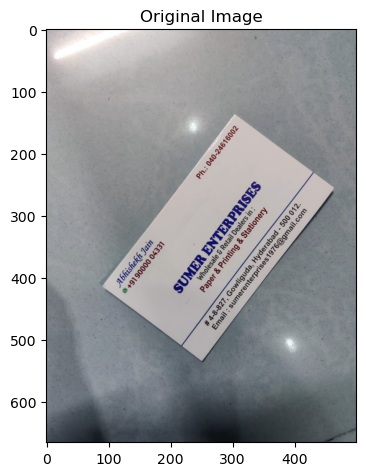

In [7]:
plt.figure(figsize=(4,10))
plt.subplot()
plt.imshow(img_re)
plt.title('Original Image')

## 2. Image Processing

1. Enhance
2. Grayscale
3. Blur
4. Edge Detect
5. Morphological transform
6. Countors
7. Find Four Points


### Enhance, Gray Scale and Blur

Text(0.5, 1.0, 'Blur Image')

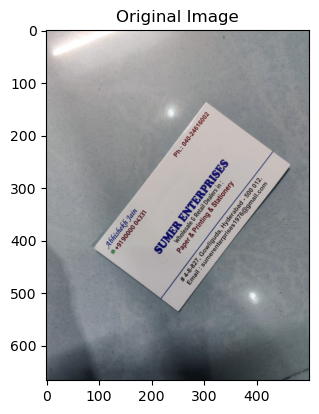

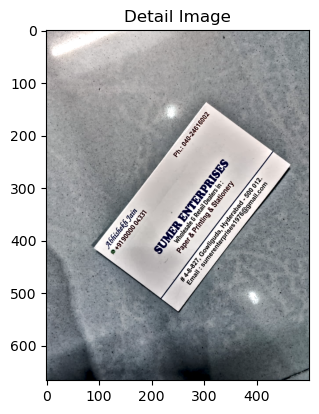

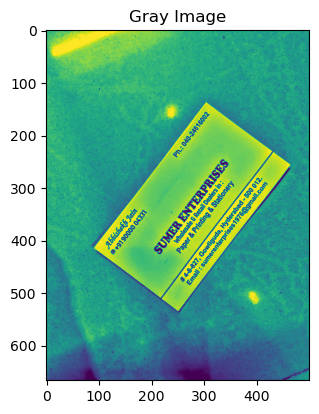

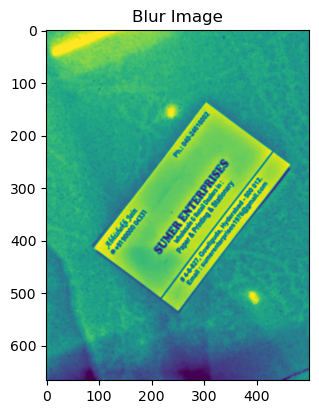

In [8]:
detail = cv2.detailEnhance(img_re, sigma_s = 20, sigma_r = 0.15)
gray = cv2.cvtColor(detail, cv2.COLOR_BGR2GRAY) # GrayScale
blur = cv2.GaussianBlur(gray, (5,5), 0 )

# View Images
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img_re)
plt.title('Original Image')

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.imshow(detail)
plt.title('Detail Image')

plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
plt.imshow(gray)
plt.title('Gray Image')

plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
plt.imshow(blur)
plt.title('Blur Image')

### Edge Detect

Text(0.5, 1.0, 'Edge Image')

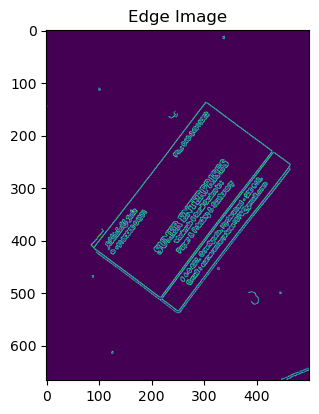

In [9]:
edge_image = cv2.Canny(blur, 75, 200)

plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
plt.imshow(edge_image)
plt.title('Edge Image')

## Morphological Transform

Text(0.5, 1.0, 'Closed Image')

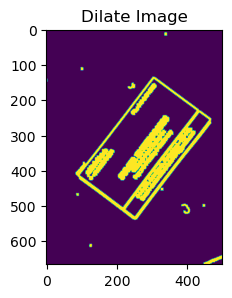

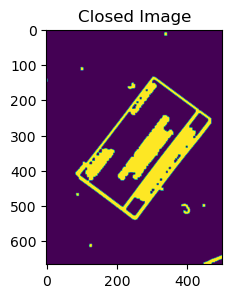

In [10]:
kernel  = np.ones((5,5), np.uint8)
dilate  = cv2.dilate(edge_image, kernel, iterations = 1)
closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(5,10))
plt.subplot(1,2,1)
plt.imshow(dilate)
plt.title('Dilate Image')

plt.figure(figsize=(5,10))
plt.subplot(1,2,2)
plt.imshow(closing)
plt.title('Closed Image')

### Find the Contours

Text(0.5, 1.0, 'Resize_contour')

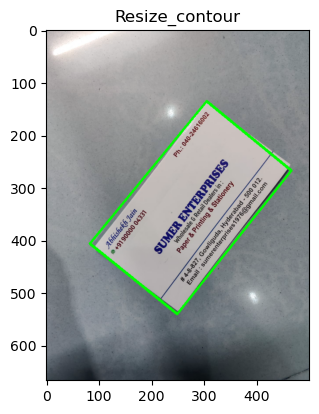

In [11]:
contours, hire = cv2.findContours(image = closing,
                                  mode = cv2.RETR_LIST, 
                                  method = cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key = cv2.contourArea, reverse=True)

for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02*peri, True)
    
    if len(approx) == 4:
        four_points = np.squeeze(approx)
        break
        
cv2.drawContours(img_re, [four_points], -1, (0, 255, 0), 3)

plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
plt.imshow(img_re)
plt.title('Resize_contour')

### Find Four points of original image

In [12]:
multiplier = img_orig.shape[1]/size[0]
four_points_orig = four_points * multiplier

## Converting it into int
four_points_orig = four_points_orig.astype(int)
four_points_orig

array([[ 732,  324],
       [ 199,  974],
       [ 597, 1296],
       [1118,  640]])

## Wrap Image

In [13]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [14]:
from imutils.perspective import four_point_transform

wrap_image = four_point_transform(img_orig, four_points_orig)

Text(0.5, 1.0, 'Wrapped Image')

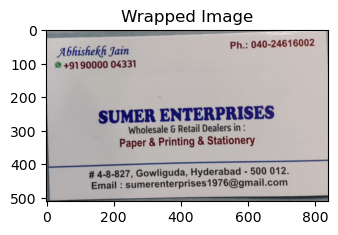

In [15]:
plt.figure(figsize=(8,10))
plt.subplot(2,2,4)
plt.imshow(wrap_image)
plt.title('Wrapped Image')

## Document Scanner Function

In [16]:
def document_scanner(img_orig):

    img_re, size = resizer(img_orig)
  
    ## Enhance, Gray Scale and Blur
    detail = cv2.detailEnhance(img_re, sigma_s = 20, sigma_r = 0.15)
    gray = cv2.cvtColor(detail, cv2.COLOR_BGR2GRAY) # GrayScale
    blur = cv2.GaussianBlur(gray, (5,5), 0 )

    ## Edge Detect
    edge_image = cv2.Canny(blur, 75, 200)

    ## Morphological Transform
    kernel  = np.ones((5,5), np.uint8)
    dilate  = cv2.dilate(edge_image, kernel, iterations = 1)
    closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)

    ## Find the Contours
    contours, hire = cv2.findContours(image = closing,
                                      mode = cv2.RETR_LIST, 
                                      method = cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key = cv2.contourArea, reverse=True)

    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02*peri, True)

        if len(approx) == 4:
            four_points = np.squeeze(approx)
            break

    cv2.drawContours(img_re, [four_points], -1, (0, 255, 0), 3)

    ## Find Four points of original image
    multiplier = img_orig.shape[1]/size[0]
    four_points_orig = four_points * multiplier

    ## Converting it into int
    four_points_orig = four_points_orig.astype(int)
    four_points_orig

    ## Wrapping the image
    wrap_image = four_point_transform(img_orig, four_points_orig)
    
    return wrap_image, four_points_orig, img_re, closing

### load Image in App

In [17]:
img_orig = cv2.imread('./images/001.jpg')

wrapimg, four_points, cnt_img, edging = document_scanner(img_orig)

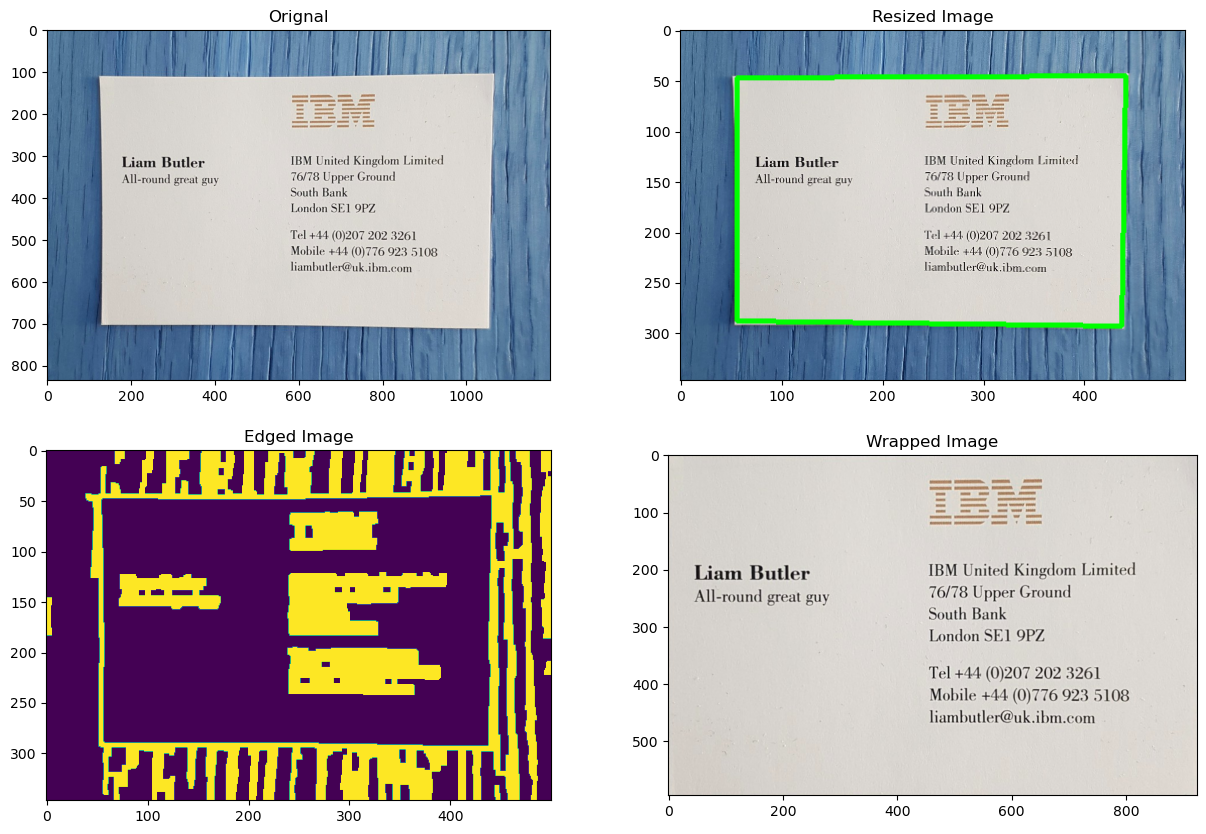

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img_orig)
plt.title('Orignal')

plt.subplot(2,2,2)
plt.imshow(cnt_img)
plt.title('Resized Image')

plt.subplot(2,2,3)
plt.imshow(edging)
plt.title('Edged Image')


plt.subplot(2,2,4)
plt.imshow(wrapimg)
plt.title('Wrapped Image')

plt.show()

## Magic Color - Contrast and Brightness Management

In [19]:
def apply_brightness_contrast(input_image, brightness = 0, contrast = 0):
    
    if brightness !=0:
        if brightness > 0:
            shadow = brightness
            highlight  = 255
            
        else:
            shadow = 0
            highlight = 255+ brightness
        alpha_b = (highlight-shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_image, alpha_b, input_image,0, gamma_b)
    else:
        buf = input_image.copy()
        
    if contrast!=0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)
        
    return buf

In [20]:
rgb = cv2.cvtColor(wrapimg, cv2.COLOR_BGR2RGB)
magic_image1 = apply_brightness_contrast(rgb, 120, 0)
magic_image2 = apply_brightness_contrast(rgb, 0, 40)
magic_image3 = apply_brightness_contrast(rgb, 50, 40)


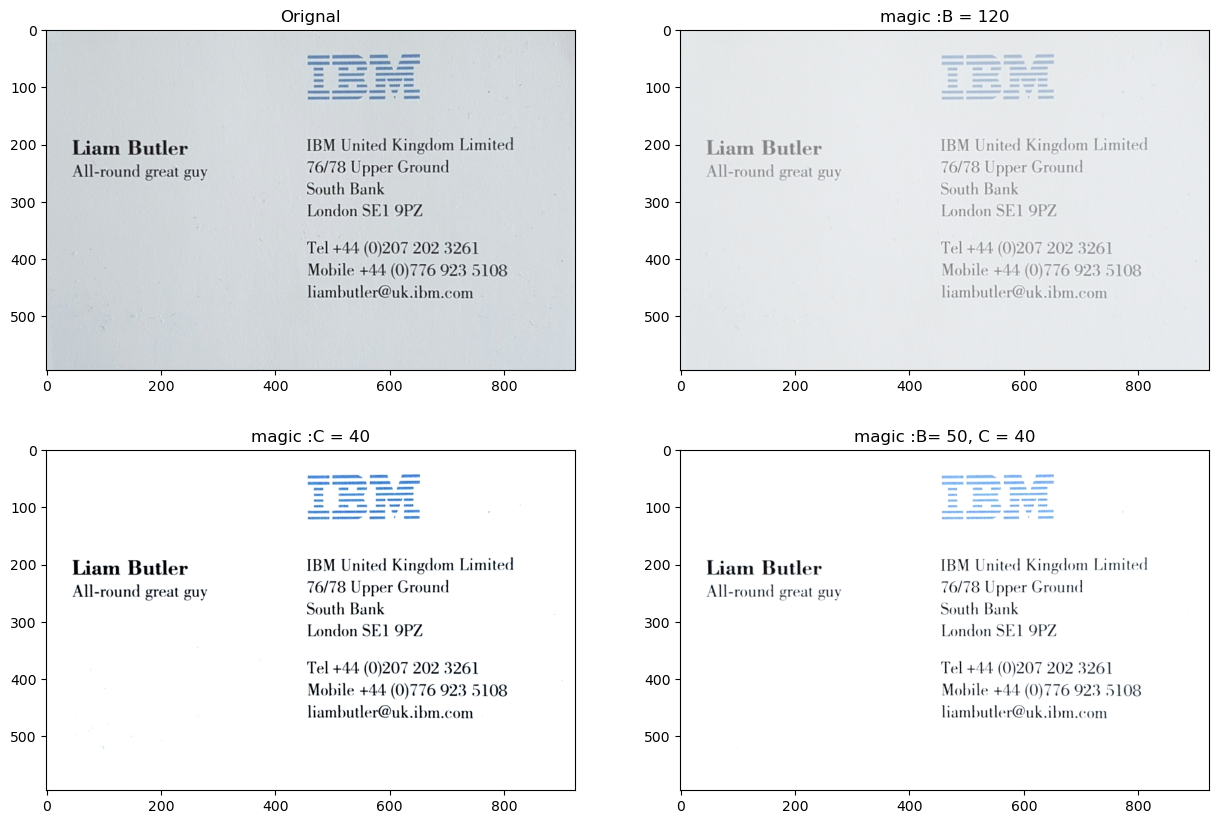

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title('Orignal')

plt.subplot(2,2,2)
plt.imshow(magic_image1)
plt.title('magic :B = 120')

plt.subplot(2,2,3)
plt.imshow(magic_image2)
plt.title('magic :C = 40')

plt.subplot(2,2,4)
plt.imshow(magic_image3)
plt.title('magic :B= 50, C = 40')

plt.show()

## Predictions

In [22]:
import predictions as pred

In [23]:
img_bb, results = pred.getPredictions(magic_image3)

Liam Butler All-round great guy IBM United Kingdom Limited 76/78 Upper Ground South Bank London SE1 9PZ Tel 44 0207 202 3261 Mobile 44 0776 923 5108 liambutler@uk.ibm.com


Text(0.5, 1.0, 'Final Predicted Image')

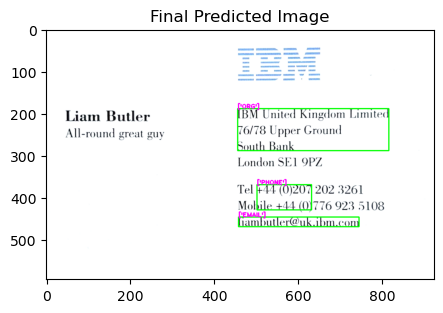

In [24]:
plt.figure(figsize=(5,8))
plt.subplot()
plt.imshow(img_bb)
plt.title('Final Predicted Image')

In [25]:
results

{'NAME': [],
 'ORG': ['Kingdom Limited 7678 Upper Ground South'],
 'DES': [],
 'PHONE': ['440207', '44'],
 'EMAIL': ['liambutler@uk.ibm.com'],
 'WEB': []}